<a href="https://colab.research.google.com/github/katusabevictoria/project-4-New-repo/blob/main/Project_4_Part_1_(Core)_Katusabe_Victoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project_4_Part_1_(Core)**

<a href="https://colab.research.google.com/github/othinAbbey/Project-4/blob/main/Onyango_Abbey_Project_4_Part_2_(Core)final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Required Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
n=800
pd.set_option('display.max_columns',n)
pd.set_option("display.max_info_rows", n)
pd.set_option('display.max_info_columns',n)
from sklearn import set_config
set_config(transform_output='pandas')


**UPLOAD DATA**

In [ ]:
filename = '/content/drive/MyDrive/Colab data uploads/adult.csv'
df = pd.read_csv(filename)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


**TARGET:income**

**What does one row represent? (A person? A business? An event? A product?)**

In [ ]:
first_row = df.iloc[1]
first_row

age                                38
workclass                     Private
fnlwgt                          89814
education                     HS-grad
educational-num                     9
marital-status     Married-civ-spouse
occupation            Farming-fishing
relationship                  Husband
race                            White
gender                           Male
capital-gain                        0
capital-loss                        0
hours-per-week                     50
native-country          United-States
income                          <=50K
Name: 1, dtype: object

**The row above represent a person's profile in USA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   age              int64 
 1   workclass        object
 2   fnlwgt           int64 
 3   education        object
 4   educational-num  int64 
 5   marital-status   object
 6   occupation       object
 7   relationship     object
 8   race             object
 9   gender           object
 10  capital-gain     int64 
 11  capital-loss     int64 
 12  hours-per-week   int64 
 13  native-country   object
 14  income           object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


**The dataset has over 14 features against the income target**

**How many rows are in the dataset?**

**What opportunities exist for dimensionality reduction or feature selection with this dataset?**

Yes, we can reduce education+eductional_num, marital_status+relationship+gender. capital_loss+capital_gain

**What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?**

**Explore/clean the data**

**Check for Missing values**

In [ ]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

**Check for data types**

In [ ]:
df.dtypes

fnlwgt                            int64
educational-num                   int64
capital-gain                      int64
capital-loss                      int64
hours-per-week                    int64
                                  ...  
native-country_Thailand            bool
native-country_Trinadad&Tobago     bool
native-country_United-States       bool
native-country_Vietnam             bool
native-country_Yugoslavia          bool
Length: 86, dtype: object




**check colums for unique values**

In [ ]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'age': [25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
Unique values in column 'workclass': ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Unique values in column 'fnlwgt': [226802  89814 336951 ... 129912 255835 257302]
Unique values in column 'education': ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
Unique values in column 'educational-num': [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
Unique values in column 'marital-status': ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
Unique values in column 'occupation': ['Machi

In [ ]:
#check unique values for age
df['age'].unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86])

**create bins for age column**

In [ ]:

# Define bins for age
num_bins = 5
# Create the bins
df['Binned_age'] = pd.cut(df['age'], bins=num_bins)
# the output is now categorical and lets label eoncode it
label_encoder = LabelEncoder()
df['Encoded_Binned_age'] = label_encoder.fit_transform(df['Binned_age'])

# Dropping the oridinal column
# Drop the original age column
df.drop('age', axis=1, inplace=True)
df.drop('Binned_age', axis=1, inplace=True)

KeyError: 'age'

**Encording the Workclass column**

In [ ]:
# Encording the Workclass column
df['workclass'].isnull().sum()
# Apply Label Encoding
label_encoder = LabelEncoder()
df['workclass_encoded'] = label_encoder.fit_transform(df['workclass'])
df.drop('workclass', axis=1, inplace=True)

KeyError: 'workclass'

In [ ]:
df['workclass_encoded'].unique()

array([4, 2, 0, 6, 1, 7, 5, 8, 3])

**encoding education column**

In [ ]:
# Label Encoding education column
label_encoder = LabelEncoder()
df['education_encoded'] = label_encoder.fit_transform(df['education'])
df.drop('education',axis=1, inplace=True)

KeyError: 'education'

In [ ]:
df['education_encoded'].unique()

array([ 1, 11,  7, 15,  0, 14,  5,  9, 12, 10,  4,  8,  6,  2,  3, 13])

**encoding marital_status column**

In [ ]:
df.columns

Index(['fnlwgt', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income', 'Encoded_Binned_age',
       'workclass_encoded', 'education_encoded'],
      dtype='object')

In [ ]:
# Apply One-Hot Encoding to categorical columns
df = pd.get_dummies(df, columns=['marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])

In [ ]:
df.dtypes

fnlwgt                            int64
educational-num                   int64
capital-gain                      int64
capital-loss                      int64
hours-per-week                    int64
                                  ...  
native-country_Thailand            bool
native-country_Trinadad&Tobago     bool
native-country_United-States       bool
native-country_Vietnam             bool
native-country_Yugoslavia          bool
Length: 86, dtype: object

In [ ]:
df['income'] = label_encoder.fit_transform(df['income'])

# Data Exploration and Visulisation

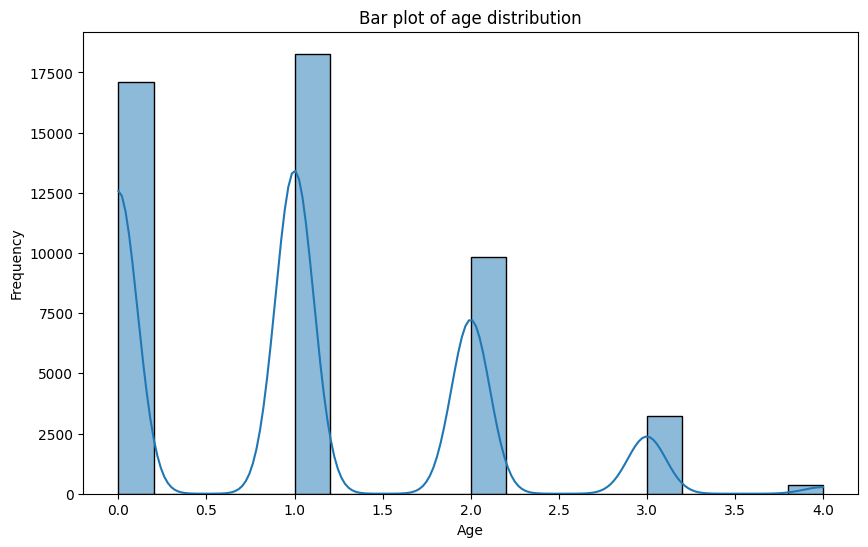

In [ ]:
# Bar plot of age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Encoded_Binned_age'], bins=20, kde=True)
plt.title('Bar plot of age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

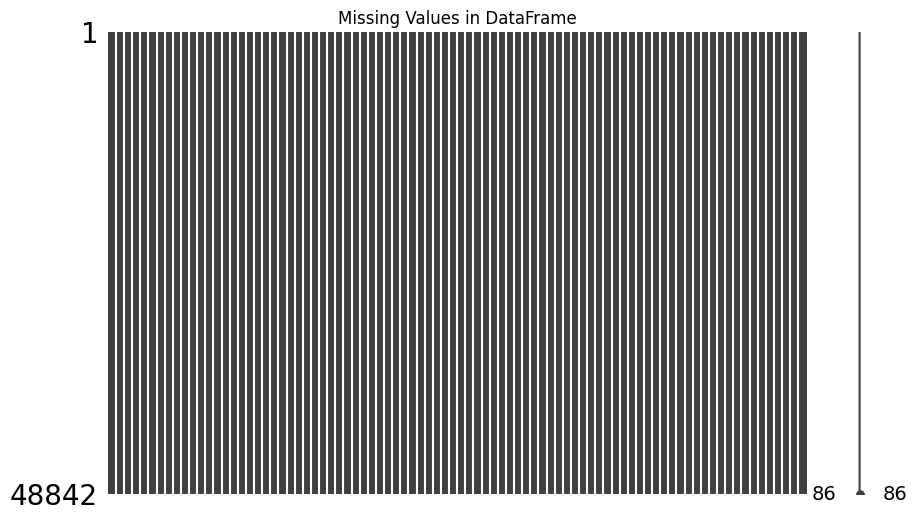

In [ ]:
msno.matrix(df, figsize=(10, 6))
plt.title('Missing Values in DataFrame')
plt.show()

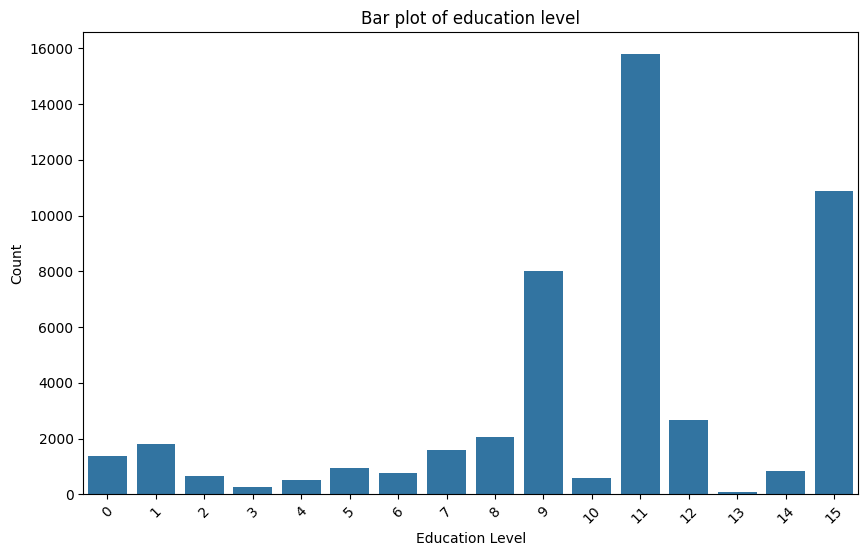

In [ ]:
# Bar plot of education level
plt.figure(figsize=(10, 6))
sns.countplot(x='education_encoded', data=df)
plt.title('Bar plot of education level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Splitting the data

In [ ]:
# Separate features (X) and target (y)
X = df.drop('income', axis=1)
y = df['income']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Imputing the missing values

In [ ]:
# Impute missing values in training set
imputer = SimpleImputer(strategy='most_frequent')  # You can choose a suitable imputation strategy
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_scaled), columns=X_train.columns)

In [ ]:
# Impute missing values in testing set (using the same imputer)
X_test_imputed = pd.DataFrame(imputer.transform(X_test_scaled), columns=X_test.columns)

In [ ]:
# Check if any missing values remain
print("Missing values in X_train_imputed:", X_train_imputed.isnull().sum())
print("Missing values in X_test_imputed:", X_test_imputed.isnull().sum())

Missing values in X_train_imputed: fnlwgt                            0
educational-num                   0
capital-gain                      0
capital-loss                      0
hours-per-week                    0
                                 ..
native-country_Thailand           0
native-country_Trinadad&Tobago    0
native-country_United-States      0
native-country_Vietnam            0
native-country_Yugoslavia         0
Length: 85, dtype: int64
Missing values in X_test_imputed: fnlwgt                            0
educational-num                   0
capital-gain                      0
capital-loss                      0
hours-per-week                    0
                                 ..
native-country_Thailand           0
native-country_Trinadad&Tobago    0
native-country_United-States      0
native-country_Vietnam            0
native-country_Yugoslavia         0
Length: 85, dtype: int64


# Fit and Evaluate the model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

def classification_metrics(y_true, y_pred, label='', verbose=True, output_dict=False):
    # Get metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    if verbose:
        # Print Result with Label and Header
        header = "-" * 60
        print(header, f"Classification Metrics: {label}", header, sep='\n')
        print(f"- Accuracy = {accuracy:,.3f}")
        print(f"- Precision = {precision:,.3f}")
        print(f"- Recall = {recall:,.3f}")
        print(f"- F1-score = {f1:,.3f}")
        print("Confusion Matrix:")
        print(cm)
    if output_dict:
        metrics = {'Label': label, 'Accuracy': accuracy,
                   'Precision': precision, 'Recall': recall, 'F1-score': f1, 'Confusion Matrix': cm}
        return metrics

def evaluate_classification(clf, X_train, y_train, X_test, y_test, verbose=True, output_frame=False):
    # Get predictions for training data
    y_train_pred = clf.predict(X_train)

    # Call the helper function to obtain classification metrics for training data
    results_train = classification_metrics(y_train, y_train_pred, verbose=verbose,
                                            output_dict=output_frame,
                                            label='Training Data')
    print()
    # Get predictions for test data
    y_test_pred = clf.predict(X_test)
    # Call the helper function to obtain classification metrics for test data
    results_test = classification_metrics(y_test, y_test_pred, verbose=verbose,
                                           output_dict=output_frame,
                                           label='Test Data')

    # Store results in a dataframe if output_frame is True
    if output_frame:
        results_df = pd.DataFrame([results_train, results_test])
        # Set the label as the index
        results_df = results_df.set_index('Label')
        # Set index.name to none to get a cleaner looking result
        results_df.index.name = None
        # Return the dataframe
        return results_df.round(3)


**Fit and evaluate a model using your new features and compare it to your model from Part 1.**

Apply at least one method of feature selection (filtering, embedded, wrapper) to your new features including engineered data.

    Fit and evaluate a final model using the selected features. Compare it with previous models

In [ ]:
# Initialize and train  classification model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_imputed, y_train)

# Evaluate the classification model
results = evaluate_classification(clf, X_train, y_train, X_test, y_test, verbose=True, output_frame=True)
print(results)

------------------------------------------------------------
Classification Metrics: Training Data
------------------------------------------------------------
- Accuracy = 0.461
- Precision = 0.305
- Recall = 0.973
- F1-score = 0.465
Confusion Matrix:
[[ 8866 20810]
 [  257  9140]]

------------------------------------------------------------
Classification Metrics: Test Data
------------------------------------------------------------
- Accuracy = 0.460
- Precision = 0.299
- Recall = 0.971
- F1-score = 0.457
Confusion Matrix:
[[2271 5208]
 [  67 2223]]
               Accuracy  Precision  Recall  F1-score  \
Training Data     0.461      0.305   0.973     0.465   
Test Data         0.460      0.299   0.971     0.457   

                           Confusion Matrix  
Training Data  [[8866, 20810], [257, 9140]]  
Test Data        [[2271, 5208], [67, 2223]]  


Extract and visualize the top 10 features using permutation importance (from Intro to ML Week 4)

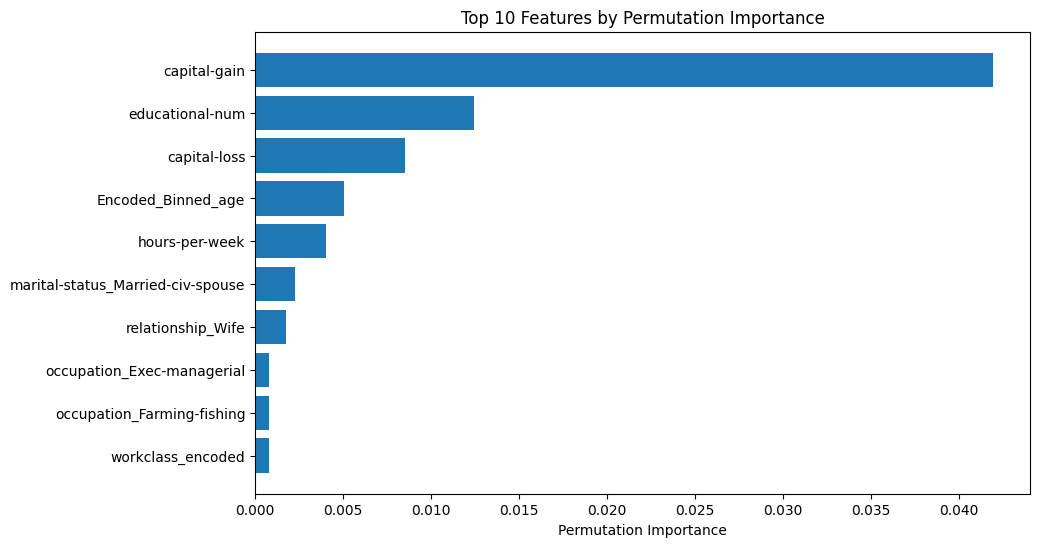

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Fit your model (replace RandomForestClassifier with your trained model)
clf.fit(X_train, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)

# Extract feature importances and names
feature_importance = perm_importance.importances_mean
feature_names = X.columns

# Sort feature importances and names
sorted_indices = feature_importance.argsort()[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the top 10 features
top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), sorted_feature_importance[:top_n], align='center')
plt.yticks(range(top_n), sorted_feature_names[:top_n])
plt.xlabel('Permutation Importance')
plt.title('Top 10 Features by Permutation Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


# Explanatory Visualizations for the most important features.

<ipython-input-87-8684d5362093>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='income', y='capital-gain', data=avg_data, palette='Blues_d')
<ipython-input-87-8684d5362093>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='income', y='educational-num', data=avg_data, palette='Greens_d')


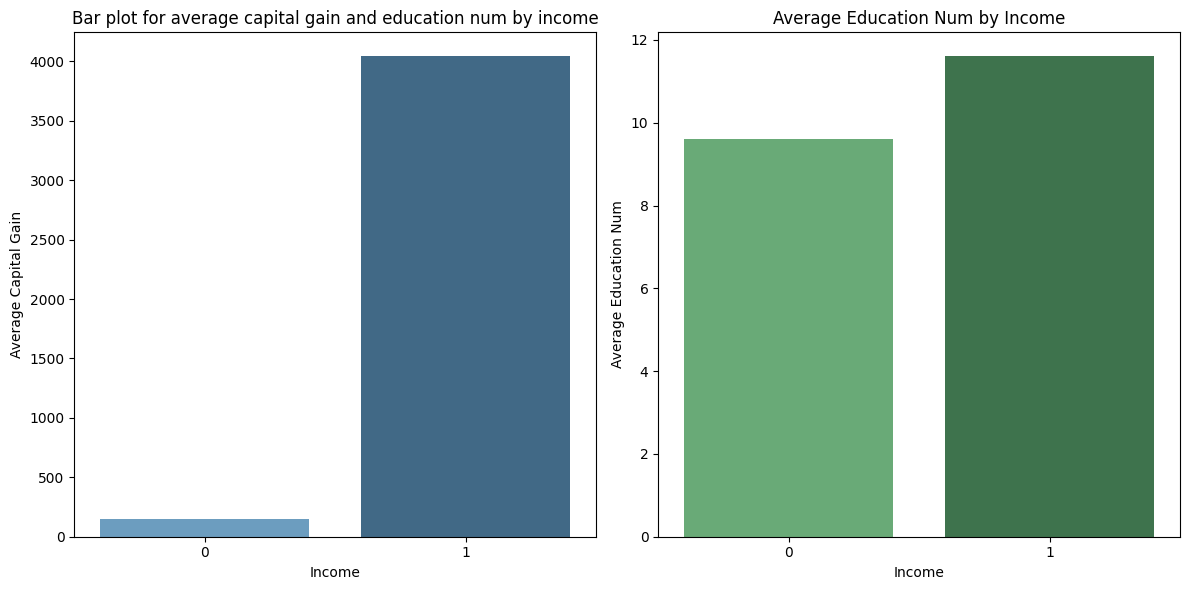

In [ ]:
# Bar plot for average capital gain and education num by income
avg_data = df.groupby('income').agg({'capital-gain': 'mean', 'educational-num': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='income', y='capital-gain', data=avg_data, palette='Blues_d')
plt.title('Bar plot for average capital gain and education num by income')
plt.xlabel('Income')
plt.ylabel('Average Capital Gain')

plt.subplot(1, 2, 2)
sns.barplot(x='income', y='educational-num', data=avg_data, palette='Greens_d')
plt.title('Average Education Num by Income')
plt.xlabel('Income')
plt.ylabel('Average Education Num')

plt.tight_layout()
plt.show()
